In [1]:
#importing necessary modules
import pandas as pd #reading/extraction of data
import numpy as np #data manipulation
import matplotlib.pyplot as plt #for visualization
from mlxtend.plotting import scatterplotmatrix, heatmap #for visualization
from sklearn.preprocessing import StandardScaler #for normalization
from linear_regression import MyLinearRegression #my built linear regression class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [2]:
#reading complete data
complete_df = pd.read_csv('data/houseprice_data.csv')
rows, cols = complete_df.shape

#print number of rows and columns of the complete data
print("number of rows: ", rows)
print("number of columns: ", cols)
print("Observation: as opposed to 18 features the data is said to have, there are actually {} features in total".format(cols))

number of rows:  21613
number of columns:  19
Observation: as opposed to 18 features the data is said to have, there are actually 19 features in total


In [3]:
#extracting some features
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']
df = pd.read_csv('data/houseprice_data.csv', usecols=columns)

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,221900.0,3,1.00,1180,5650,1.0,3,7
1,538000.0,3,2.25,2570,7242,2.0,3,7
2,180000.0,2,1.00,770,10000,1.0,3,6
3,604000.0,4,3.00,1960,5000,1.0,5,7
4,510000.0,3,2.00,1680,8080,1.0,3,8


In [5]:
#check if there are null enteries
complete_df.isnull().sum()
print("There are no null/missing values...good to go")

There are no null/missing values...good to go


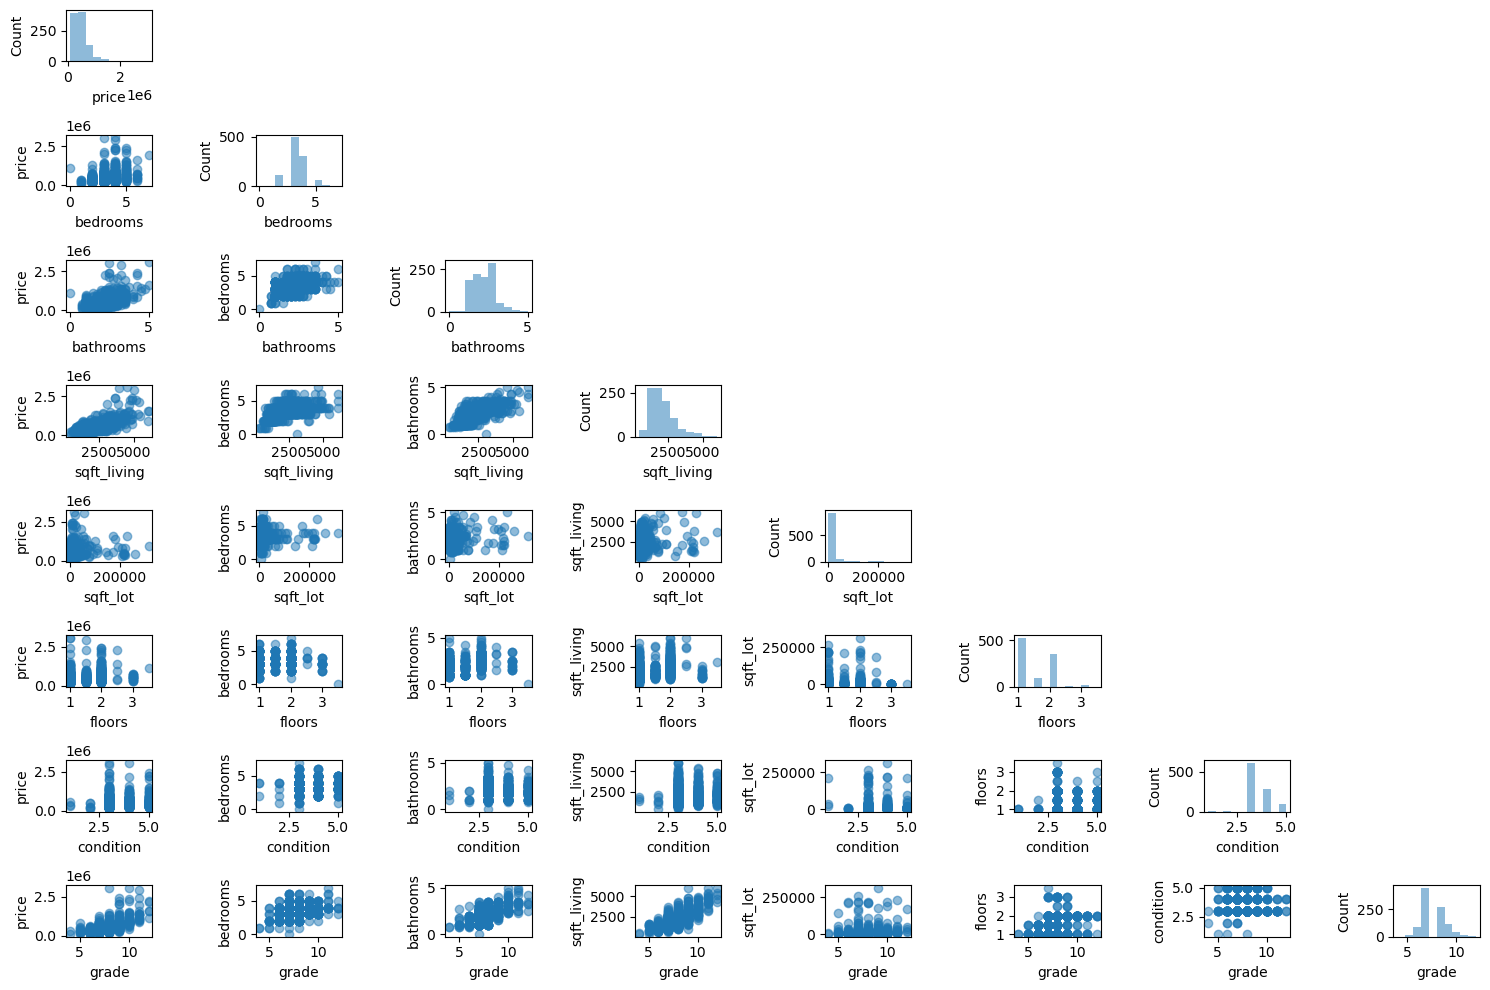

In [6]:
#selecting the first 10000 rows of the data for visualization
sample_100_df = df.iloc[0:1000] #I have taken a few samples for the sake of visualization
scatterplotmatrix(sample_100_df.values, figsize = (15, 10), names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
#From the plot above (third row), it is noticeable that there is a relationship between house price and number of bathrooms. Thesame thing can be said for bedrooms and bathrooms in the same row
#I have selected a few features above without considering how correlated these features are to each other
#To fit a linear regression model, it is important to choose feature that have high correlation with the target variable which is the 'price' in our case
#Let's try to visualize the entire data to see how correlated the features are to each other. THis will help us in selecting features that are linearly correlated to each other

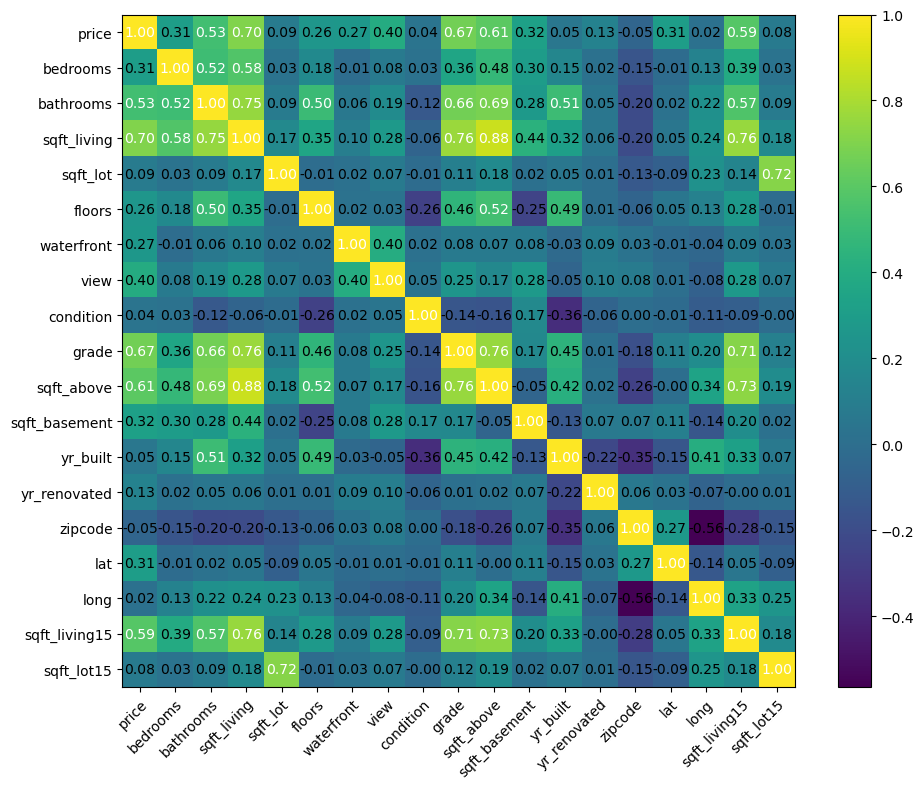

In [8]:
#Note:  I'm using the entired dataset now. 
correlation_matrix = np.corrcoef(complete_df.values.T)
h_map = heatmap(correlation_matrix, row_names=complete_df.columns,column_names=complete_df.columns, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [9]:
#It is evident in the plot above that sqft_living has the highest correlation (0.7) with our target variable 'price", followed by the 'grade' and the 'sqft_above'

In [10]:
#Using the feature with the highest correlation to as 'x' to train our model and predict y, price
X = complete_df[['sqft_living']].values
y = complete_df['price'].values 
x_normalization, y_normalization = StandardScaler(), StandardScaler()
X_std = x_normalization.fit_transform(X)

#Most data preprocessing classes in sklearn requires data to be 2-d array, I'm adding a new dimension(num_rows, 1) to the array which was initially 1-d (num_rows, ) and then flattened it back 
y_std = y_normalization.fit_transform(y[:, np.newaxis]).flatten()

lr = MyLinearRegression(lr = 0.1, num_iteration=20) #further analysis can be made with the lr and num o
lr.fit(X_std, y_std)


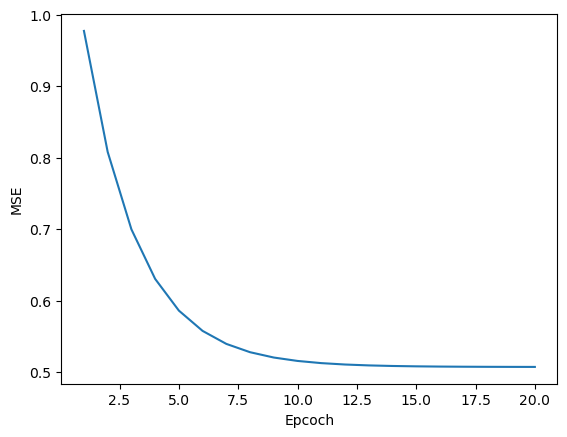

In [11]:
lr.plot_error()

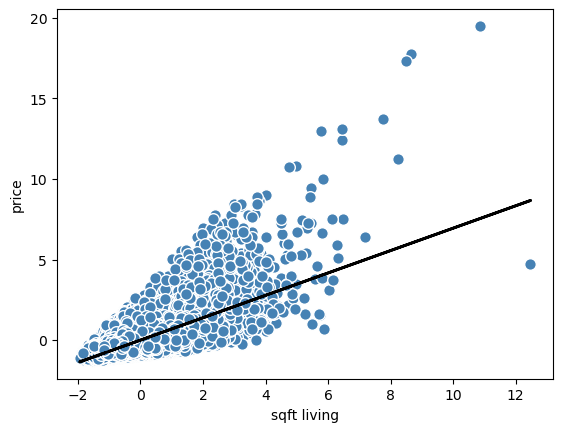

In [12]:
lr.see_datafit(X_std, y_std)
plt.xlabel('sqft living')
plt.ylabel('price')
plt.show()


In [13]:
#Performance evaluation of our linear regression model
#we will split the data into train and test sets

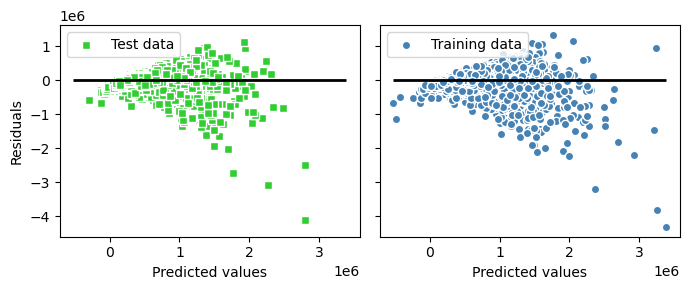

In [14]:
target = 'price'
features = complete_df.columns[complete_df.columns != target]
X = complete_df[features].values 
y = complete_df[target].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=128)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_train_pred = lr2.predict(X_train)
y_test_pred = lr2.predict(X_test)

#visualize
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

#plt.savefig('figures/09_11.png', dpi=300)
plt.show()

In [15]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}, test: {mse_test:.2f}')

r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MSE train: 40859473020.37, test: 40034178515.24
R^2 train: 0.71
R^2 test: 0.69


In [ ]:
#Clustering
